In [1]:
from config import *
append_path('../')

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from deep_learn.nn import ann
from deep_learn.utils.cost import logistic_cost
import matplotlib.pyplot as plt
from config import *
append_path('../')

In [3]:
data = pd.read_csv("./data/train.csv")
# data = pd.read_csv("./data/creditcard.csv")

In [4]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [5]:
features = data.columns.tolist()
features.remove('id')
# features.remove('Time')
output = "target"
# output = "Class"
features.remove(output)

In [6]:
train_data, test_data = train_test_split(data, test_size = 0.1, random_state = 0)

In [7]:
train_data.shape

(535690, 59)

In [8]:
test_data.shape

(59522, 59)

In [9]:
def get_xy_data(dataframe, features = None, output = None):

    '''a function for parsing the feature matrix and output array from a pandas dataframe'''

    # to ignore pandas warning
    import warnings
    warnings.filterwarnings('ignore')

    # import numpy
    import numpy as np

    # if no featues are given then just return the a numpy matrix of the dataframe
    if features == None:
        return dataframe.as_matrix()

    # extract the feature matrix and convert it to numpy array
    X = dataframe[features].as_matrix()

    # if there is no output
    if output == None:
        return X
    # if the output vector is wanted by the user
    else:
        # extracting the output columns and converting it to numpy array
        y = dataframe[output].as_matrix()
        y = np.reshape(y, (-1,1))
        # returning the feature matrix and output vector
        return (X, y)

In [10]:
X_train, Y_train = get_xy_data(train_data, features=features, output=output)
X_test, Y_test = get_xy_data(test_data, features=features, output=output)

In [11]:
layers_dims = [57, 60,120,50,1]

In [12]:
model = ann(layers_dims=layers_dims)

In [13]:
batch_size = 1000
learning_rate = 0.0001
num_iterations = 16000

In [14]:
model.fit(X_train, Y_train, X_test, Y_test, batch_size, learning_rate = learning_rate, num_iterations = num_iterations, print_cost=True)

Cost after iteration 0: 1.548899
Cost after iteration 100: 1.441050
Cost after iteration 200: 1.357559
Cost after iteration 300: 1.271110
Cost after iteration 400: 1.179900
Cost after iteration 500: 1.113041
Cost after iteration 600: 1.044103
Cost after iteration 700: 0.982243
Cost after iteration 800: 0.927724
Cost after iteration 900: 0.870869
Cost after iteration 1000: 0.821023
Cost after iteration 1100: 0.774281
Cost after iteration 1200: 0.731816
Cost after iteration 1300: 0.693483
Cost after iteration 1400: 0.658367
Cost after iteration 1500: 0.625835
Cost after iteration 1600: 0.595722
Cost after iteration 1700: 0.569438
Cost after iteration 1800: 0.546663
Cost after iteration 1900: 0.520389
Cost after iteration 2000: 0.500278
Cost after iteration 2100: 0.478699
Cost after iteration 2200: 0.460054
Cost after iteration 2300: 0.452192
Cost after iteration 2400: 0.435842
Cost after iteration 2500: 0.410079
Cost after iteration 2600: 0.400953
Cost after iteration 2700: 0.386670
Cost

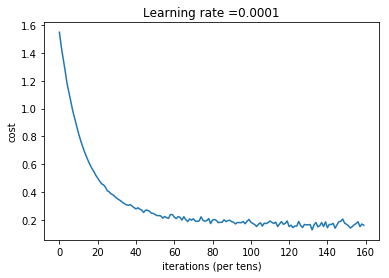

In [15]:
# plot the cost
plt.plot(np.squeeze(model.costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()